In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def logToMsgs(name):
    file = open(name)
    comments = 0
    while True:
        line = file.readline()
        if not line:
            break
        elif not line.startswith('#'):
            arr = line.strip().split(',')
            yield [(int(x) % 256) for x in arr[:-1]]

In [82]:
msgs = list(logToMsgs('../resources/logs/test.log'))
msgs_size = list(logToMsgs('../resources/logs/test_size.log'))
msgs_split = list(logToMsgs('../resources/logs/test_split.log'))
msgs_duplicate = list(logToMsgs('../resources/logs/test_duplicate.log'))
msgs_combined = list(logToMsgs('../resources/logs/test_combined.log'))
msgs_combined2 = list(logToMsgs('../resources/logs/test_combined2.log'))

ids = np.array([msg[0] for msg in msgs])
ids_size = np.array([msg[0] for msg in msgs_size])
ids_split = np.array([msg[0] for msg in msgs_split])
ids_duplicate = np.array([msg[0] for msg in msgs_duplicate])
ids_combined = np.array([msg[0] for msg in msgs_combined])
ids_combined2 = np.array([msg[0] for msg in msgs_combined2])

sizes = np.array([len(msg) for msg in msgs])
sizes_size = np.array([len(msg) for msg in msgs_size])
sizes_split = np.array([len(msg) for msg in msgs_split])
sizes_duplicate = np.array([len(msg) for msg in msgs_duplicate])
sizes_combined = np.array([len(msg) for msg in msgs_combined])
sizes_combined2 = np.array([len(msg) for msg in msgs_combined2])



print(sum(sizes))
print(sum(sizes_size))
print(sum(sizes_split))
print(sum(sizes_duplicate))
print(sum(sizes_combined))
print(sum(sizes_combined2))


1200
1800
1400
1200
3384
5802


(100, 200)

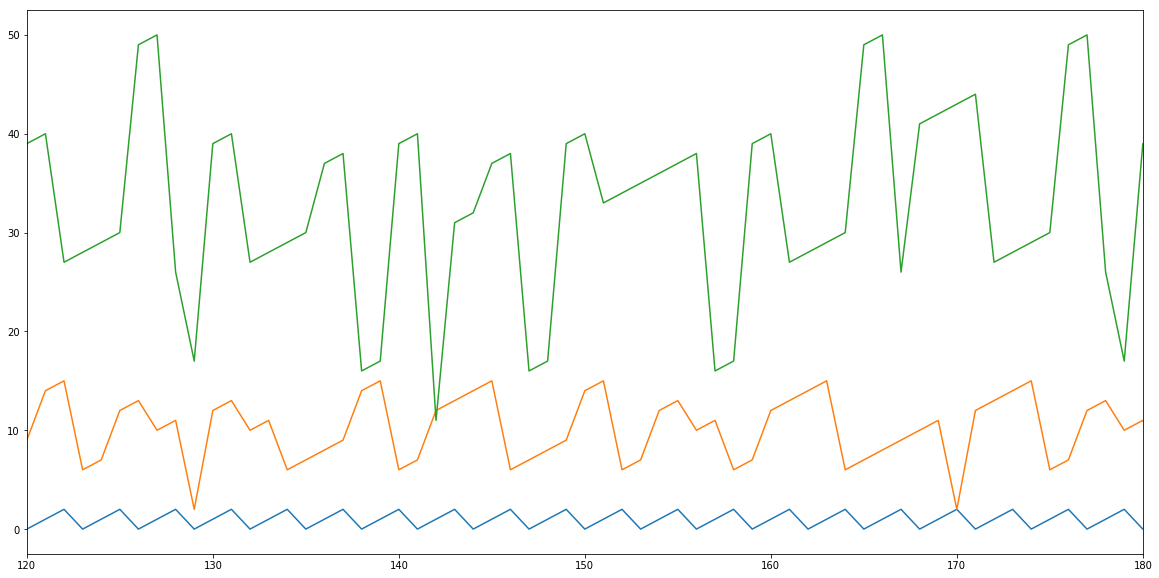

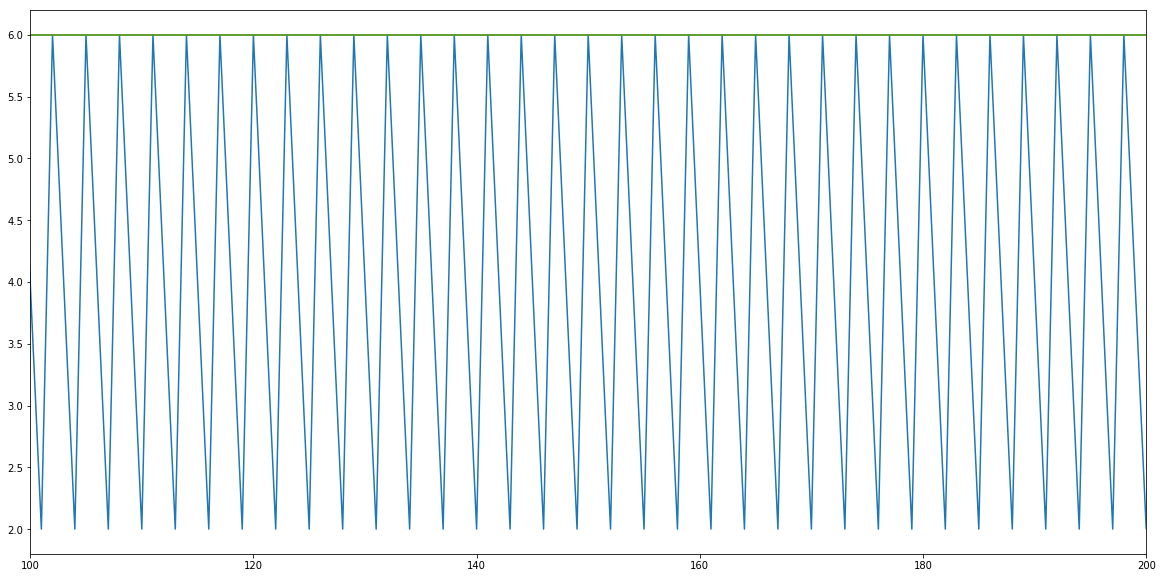

In [83]:
plt.figure(2, figsize=(20,10))
plt.plot(ids)
# plt.plot(ids_size)
# plt.plot(ids_split)
# plt.plot(ids_duplicate)
plt.plot(ids_combined)
plt.plot(ids_combined2)
plt.xlim(120,180)

plt.figure(20, figsize=(20,10))
plt.plot(sizes)
# plt.plot(sizes_size)
# plt.plot(sizes_split)
# plt.plot(sizes_duplicate)
plt.plot(sizes_combined)
plt.plot(sizes_combined2)
plt.xlim(100,200)

(0, 0.5)

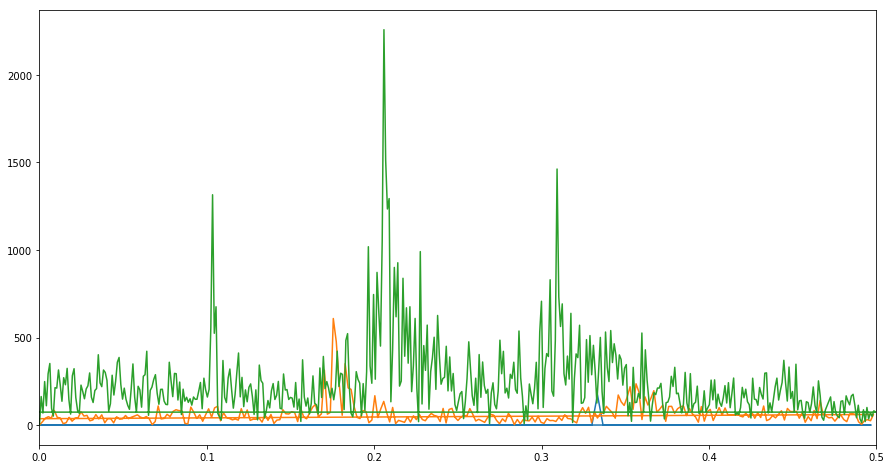

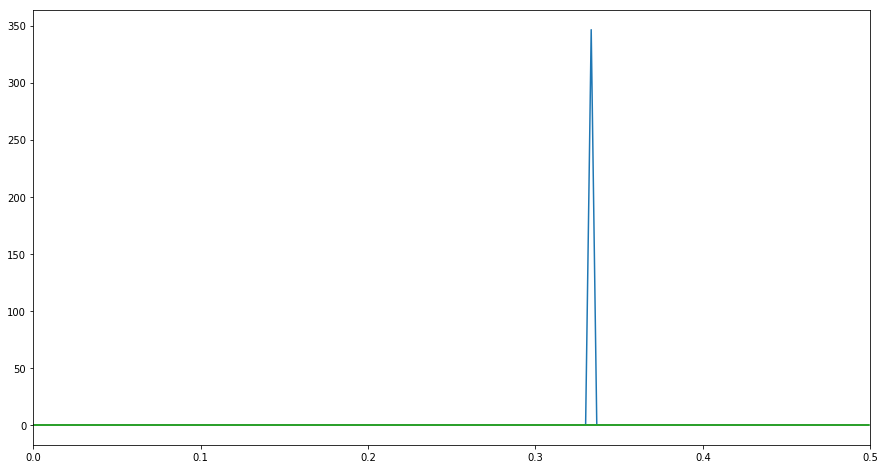

In [84]:
#See if there are patterns repeating, using FFT on the IDS
fftID = np.fft.fft(ids-np.mean(ids))
fftID_size = np.fft.fft(ids_size-np.mean(ids_size))
fftID_split = np.fft.fft(ids_split-np.mean(ids_split))
fftID_duplicate = np.fft.fft(ids_duplicate-np.mean(ids_duplicate))
fftID_combined = np.fft.fft(ids_combined-np.mean(ids_combined))
fftID_combined2 = np.fft.fft(ids_combined2-np.mean(ids_combined2))

plt.figure(10, figsize=(15,8))
plt.plot(np.fft.fftfreq(fftID.size),np.abs(fftID))
# plt.plot(np.fft.fftfreq(fftID_size.size),np.abs(fftID_size))
# plt.plot(np.fft.fftfreq(fftID_split.size),np.abs(fftID_split))
# plt.plot(np.fft.fftfreq(fftID_duplicate.size),np.abs(fftID_duplicate))
plt.plot(np.fft.fftfreq(fftID_combined.size),np.abs(fftID_combined))
plt.plot(np.fft.fftfreq(fftID_combined2.size),np.abs(fftID_combined2))
plt.xlim((0,0.5))
#plt.ylim((0,2500))

fftSize = np.fft.fft(sizes-np.mean(sizes))
fftSize_size = np.fft.fft(sizes_size-np.mean(sizes_size))
fftSize_split = np.fft.fft(sizes_split-np.mean(sizes_split))
fftSize_duplicate = np.fft.fft(sizes_duplicate-np.mean(sizes_duplicate))
fftSize_combined = np.fft.fft(sizes_combined-np.mean(sizes_combined))
fftSize_combined2 = np.fft.fft(sizes_combined2-np.mean(sizes_combined2))

plt.figure(11, figsize=(15,8))
plt.plot(np.fft.fftfreq(fftSize.size),np.abs(fftSize))
# plt.plot(np.fft.fftfreq(fftSize_size.size),np.abs(fftSize_size))
# plt.plot(np.fft.fftfreq(fftSize_split.size),np.abs(fftSize_split))
# plt.plot(np.fft.fftfreq(fftSize_duplicate.size),np.abs(fftSize_duplicate))
plt.plot(np.fft.fftfreq(fftSize_combined.size),np.abs(fftSize_combined))
plt.plot(np.fft.fftfreq(fftSize_combined2.size),np.abs(fftSize_combined2))
plt.xlim((0,0.5))
#plt.ylim((0,2500))

#Just for fun, not sure it makes any kind of sense...?
#fftfftID4_5 = np.fft.fft(np.fft.fft(ids4_5-np.mean(ids4_5)))
#fftfftID4_6 = np.fft.fft(np.fft.fft(ids4_6-np.mean(ids4_6)))
#plt.figure(11, figsize=(15,8))
#plt.plot(np.fft.fftfreq(fftfftID4_5.size),np.abs(fftfftID4_5))
#plt.plot(np.fft.fftfreq(fftfftID4_6.size),np.abs(fftfftID4_6))
#plt.xlim((-0.2,0.2))
#plt.ylim((0,10000))

In [69]:
def compute_corr(ids):
    N = ids.size
    cors = np.zeros(2*N-1)

    for i in range(0,2*N-1):
        n = i-N+1
        if (n < 0):
            sig1 = ids[-n:]
            sig2 = ids[:n]
        elif (n == 0):
            sig1 = ids
            sig2 = ids
        else:
            sig1 = ids[:-n]
            sig2 = ids[n:]
        # Remove mean
        sig1 = sig1-np.mean(sig1)
        sig2 = sig2-np.mean(sig2)
        corr = np.sum(sig1*sig2)
        # Normalize
        std = np.sqrt(np.sum(sig1*sig1)*np.sum(sig2*sig2))
        if (std > 0):
            corr = corr/std
        cors[i] = corr
    return cors


In [17]:
compute_corr(ids0_1)

0.0

(75, 125)

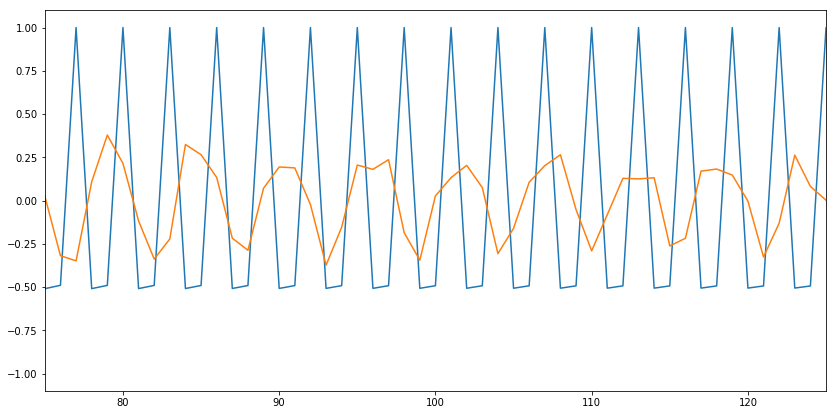

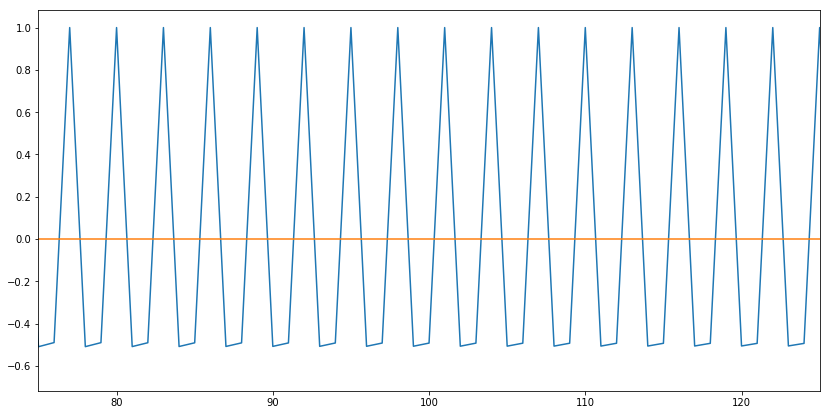

In [81]:
#Not sure what we can see here that we cannot see in the firt FFT... 
#The shift of 3 messages in the non-diversified version is shown by the peak at 1/3Hz in the FFT
#If we want to correlate something, I guess we should look at two (or n) different diversified implementations
#and see if we can learn something more than with just one.

cors = compute_corr(ids)
cors_size = compute_corr(ids_size)
cors_split = compute_corr(ids_split)
cors_duplicate = compute_corr(ids_duplicate)
cors_combined = compute_corr(ids_combined)

plt.figure(5, figsize=(14,7))
plt.plot(cors)
# plt.plot(cors_size)
# plt.plot(cors_split)
# plt.plot(cors_duplicate)
plt.plot(cors_combined)
plt.xlim(75,125)


cors2 = compute_corr(sizes)
cors2_size = compute_corr(sizes_size)
cors2_split = compute_corr(sizes_split)
cors2_duplicate = compute_corr(sizes_duplicate)
cors2_combined = compute_corr(sizes_combined)

plt.figure(50, figsize=(14,7))
plt.plot(cors2)
# plt.plot(cors2_size)
# plt.plot(cors2_split)
# plt.plot(cors2_duplicate)
plt.plot(cors2_combined)
plt.xlim(75,125)

(0, 75)

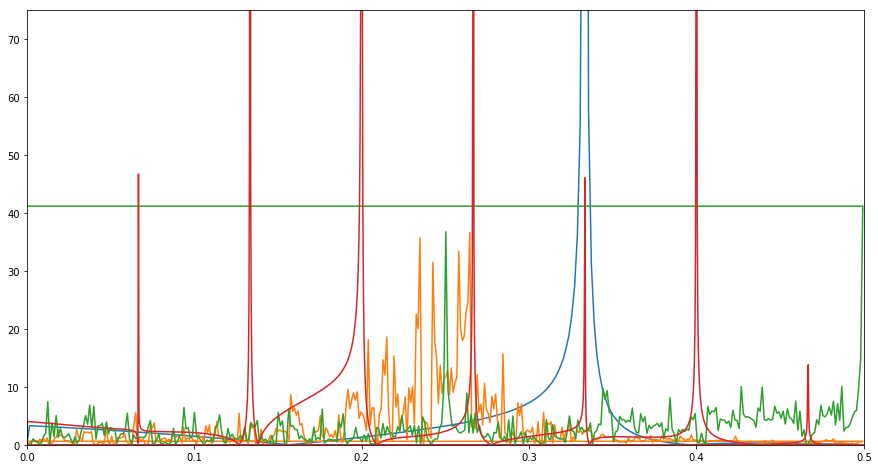

In [61]:
#Not sure this makes sense...? Anyway, the first FFT on IDS looks quite similar, and 
#can be explained more easily.
fft0_1 = np.fft.fft(cors0_1-np.mean(cors0_1))
#fft4_5 = np.fft.fft(cors4_5-np.mean(cors4_5))
#fft4_6 = np.fft.fft(cors4_6-np.mean(cors4_6))
#fft4_1 = np.fft.fft(cors4_1-np.mean(cors4_1))

plt.figure(3, figsize=(15,8))
plt.plot(np.fft.fftfreq(fft0_1.size),np.abs(fft0_1))
#plt.plot(np.fft.fftfreq(fft4_5.size),np.abs(fft4_5))
#plt.plot(np.fft.fftfreq(fft4_6.size),np.abs(fft4_6))
#plt.plot(np.fft.fftfreq(fft4_1.size),np.abs(fft4_1))
plt.xlim((0,0.5))
plt.ylim((0,75))

(0, 10)

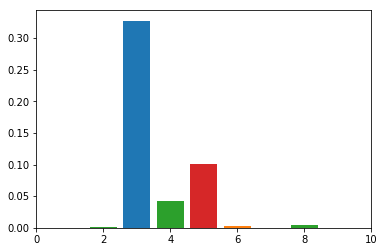

In [71]:
def corhist(cors):
    peaks = np.zeros_like(cors)

    for n in range(1,peaks.size-1):
        if cors[n-1] < cors[n] and cors[n] > cors[n+1] and cors[n] > 0:
            peaks[n] = cors[n]
    
    inds = np.where(peaks > 0)[0]
    wts = peaks[inds][1:]
    dm = np.diff(inds)
    
    bins = np.unique(dm)
    hist = np.zeros_like(bins)
    for i in range(0,len(bins)):
        bi = bins[i]
        hist[i] = np.sum(wts[np.where(dm == bi)])
    
    return bins, hist/cors.size

    #DT = np.diff(np.where(peaks == 1)[0])
    #return np.diff(np.where(peaks > 0)[0])


#corhist(cors4_5)

plt.figure(9)
#plt.bar(corhist(cors0_1))

x, y = corhist(cors0_1)
plt.bar(x, y)
#x, y = corhist(cors4_5)
#plt.bar(x, y)
#x, y = corhist(cors4_6)
#plt.bar(x, y)
#x, y = corhist(cors4_1)
#plt.bar(x, y)

plt.xlim(0,10)


# plt.plot(corhist(cors4_5))
# plt.plot(corhist(cors4_6))
# plt.plot(corhist(cors4_1))
# plt.figure(12)
# plt.hist(DT(cors4_6))
# plt.hist(DT(cors4_1))

In [10]:
tops = np.where(cors > 0.95)[0]
dt = np.diff(tops);

plt.figure(8)
plt.hist(dt, bins=np.arange(0,20)-.5)

#ids.size/3

NameError: name 'cors' is not defined

In [ ]:
idsn = (ids-np.min(ids))/(np.max(ids)-np.min(ids))



corr = np.correlate(ids, ids, mode='full')

plt.figure(1, figsize=(15,8))
plt.plot(corr/idsn.size)
#plt.ylim((0,1))
#plt.xlim(0,30)


In [ ]:
ids.shape

In [ ]:
ids2 = np.interp(np.arange(0,1500*1000)/1000, np.arange(0,1500), ids)

IDS = np.fft.fft(ids2-np.mean(ids2))

plt.figure(3, figsize=(15,8))
plt.plot(np.fft.fftfreq(ids2.size),np.abs(IDS))
plt.xlim((-1/15,1/15))

In [ ]:
print(corr)